# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 38.2/38.2 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 266.3/266.3 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
     ---------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\saite\AppData\Local\Temp\pip-install-hljivf7n\tensorflow-gpu_92444d4d51084a3996ea2697d59d9788\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [5]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [6]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [11]:
import cv2
import imghdr

In [12]:
data_dir = 'data' 

In [18]:
os.listdir(data_dir)

['happy', 'sad']

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

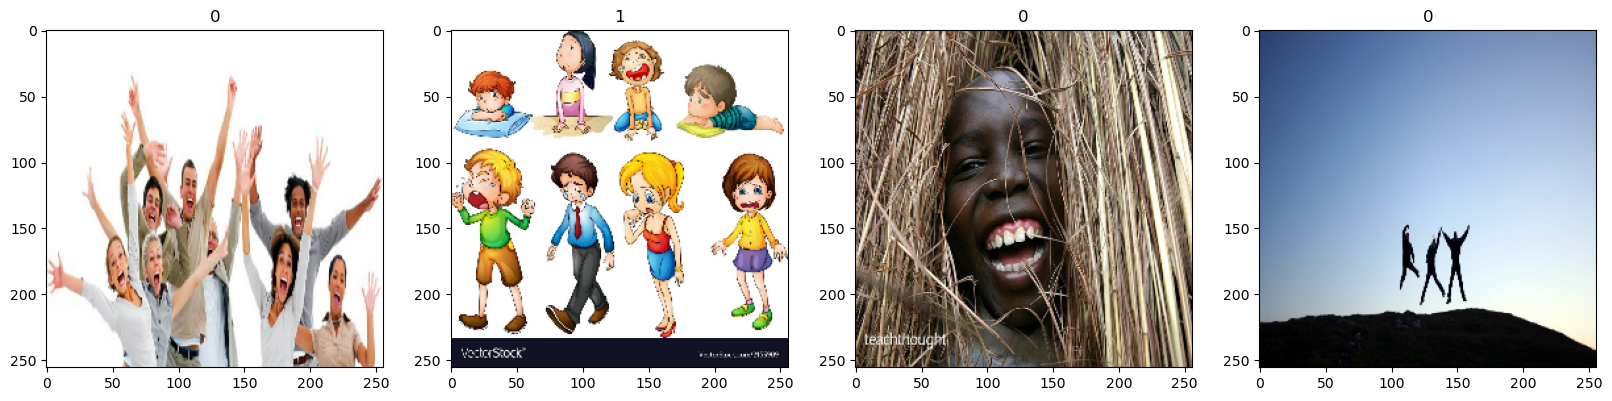

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
data.as_numpy_iterator().next()

(array([[[[8.43504906e-01, 8.39583337e-01, 8.23897064e-01],
          [7.69332111e-01, 7.65410542e-01, 7.49724269e-01],
          [8.15180779e-01, 8.11259210e-01, 7.95572937e-01],
          ...,
          [6.55805767e-01, 6.51884198e-01, 6.36197925e-01],
          [7.86841273e-01, 7.82919705e-01, 7.67233431e-01],
          [7.67907500e-01, 7.63985932e-01, 7.48299658e-01]],
 
         [[8.13082457e-01, 8.09160888e-01, 7.93474615e-01],
          [7.80407488e-01, 7.76485920e-01, 7.60799646e-01],
          [8.14327836e-01, 8.10406268e-01, 7.94719994e-01],
          ...,
          [6.72236919e-01, 6.68315351e-01, 6.52629077e-01],
          [7.75428712e-01, 7.71507144e-01, 7.55820870e-01],
          [7.60422528e-01, 7.56500959e-01, 7.40814686e-01]],
 
         [[7.75625050e-01, 7.71703482e-01, 7.56017208e-01],
          [7.94332445e-01, 7.90410876e-01, 7.74724603e-01],
          [8.14331532e-01, 8.10409963e-01, 7.94723690e-01],
          ...,
          [6.89213037e-01, 6.85291469e-01, 6.6960

# 5. Split Data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

7

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [27]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 0.8396 - accuracy: 0.5223 - val_loss: 0.6799 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 21s 3s/step - loss: 0.6413 - accuracy: 0.5804 - val_loss: 0.6228 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 20s 2s/step - loss: 0.5820 - accuracy: 0.6786 - val_loss: 0.5182 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 20s 2s/step - loss: 0.5413 - accuracy: 0.7366 - val_loss: 0.4958 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.4569 - accuracy: 0.7946 - val_loss: 0.4844 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 22s 3s/step - loss: 0.4264 - accuracy: 0.8214 - val_loss: 0.3606 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 23s 3s/step - loss: 0.3750 - accuracy: 0.8259 - val_loss: 0.4649 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==================

# 8. Plot Performance

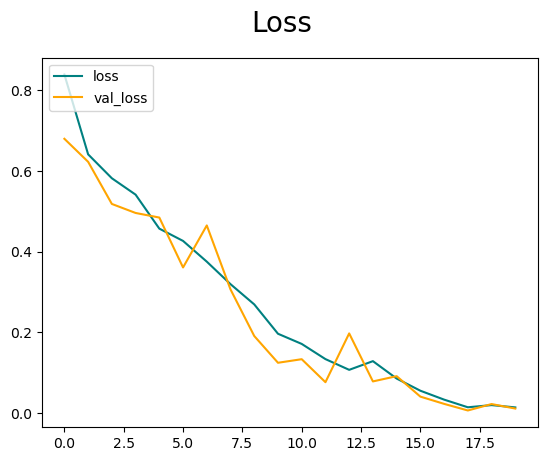

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

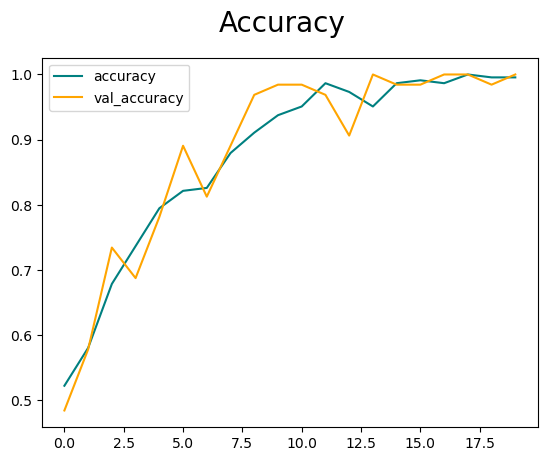

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 3s 3s/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [42]:
import cv2

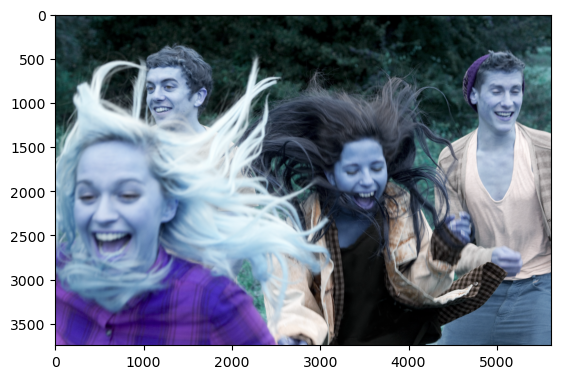

In [43]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

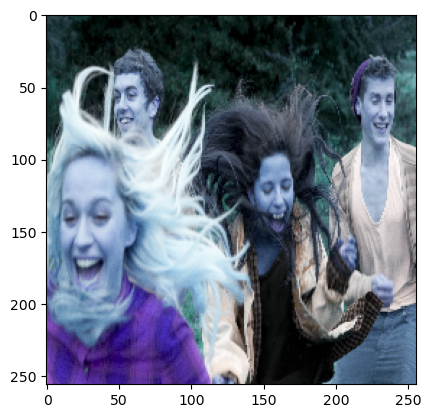

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


In [46]:
yhat

array([[0.0043059]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)